In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
data_dir <- file.path("..", "data")
sql_dir <- file.path("..", "sql")

In [3]:
importance <- readRDS(file.path(data_dir, "feature_importance.rds")) %>%
rename(cov = var, inf = rel.inf) %>%
mutate(cov = str_replace_all(cov, "_", " ")) %>%
mutate(cov_ = cov) %>%
mutate(cov = str_replace_all(cov, "lab|vs|flag|icd|first", "")) %>%
mutate(cov = str_replace_all(cov, "\\s+$|^\\s+", "")) %>%
mutate(cov = case_when(
    grepl("icd|lab", cov_) ~ toupper(cov),
    TRUE ~ tools::toTitleCase(cov)
)) %>%
mutate(cov = case_when(
    cov == "Careunit" ~ "Service Unit",
    cov == "Weight" ~ "Weight",
    cov == "Elix Score" ~ "Elixhauser Score",
    cov == "Saps" ~ "SAPS Score",
    cov == "Sofa" ~ "SOFA Score",
    cov == "Vent" ~ "Ventilation Use (1st 24 Hrs)",
    cov == "Vaso" ~ "Vasopressor Use (1st 24 Hrs)",
    cov == "Sedative" ~ "Sedative Use (1st 24 Hrs)",
    cov == "Icu Adm Weekday" ~ "Day of ICU Admission",
    cov == "Icu Adm Hour" ~ "Hour of ICU Admission",
    cov == "Temp" ~ "Temperature",
    cov == "Map" ~ "MAP",
    cov == "Cvp" ~ "CVP (measured)",
    cov %in% c("TROPONIN", "BNP", "CREATININE KINASE") ~ paste(cov, "(tested)"),
    TRUE ~ cov
)) %>%
select(-cov_)

importance

cov,inf
CHF,17.70378294
Hour of ICU Admission,14.09868662
CREATININE KINASE (tested),8.22139445
PO2,7.13191952
TROPONIN (tested),6.98686826
Age,6.90195538
SOFA Score,4.03335517
AFIB,3.94526815
Weight,3.79052821
PLATELET,2.38565890


In [4]:
data.table::fwrite(importance, file.path(data_dir, "relative_influence.csv"))

In [5]:
options(repr.plot.width = 10, repr.plot.height = 6.2)

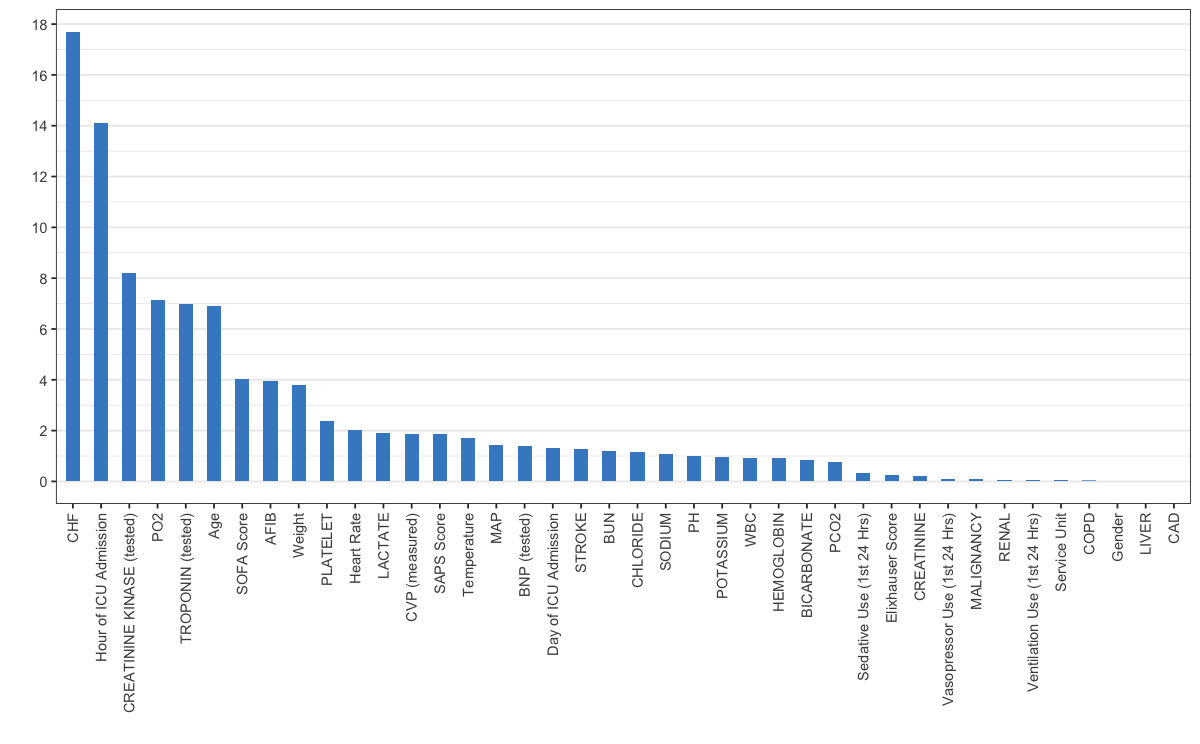

In [6]:
importance %>%
ggplot() +
geom_col(aes(x = cov, y = inf), width = .5,
         fill = rgb(66, 139, 202, maxColorValue = 255)) +
scale_x_discrete(limits = importance$cov) +
scale_y_continuous(breaks = seq(0, 18, 2)) +
labs(x = "", y = "") +
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = .5),
      panel.grid.minor.x = element_blank(), panel.grid.major.x = element_blank())